In [52]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency

In [53]:
df = pd.read_csv('student_habits_performance.csv')

In [54]:
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


In [55]:
df['study_hours_per_day'].min()

np.float64(0.0)

In [56]:
df['study_hours_per_day'].max()

np.float64(8.3)

In [57]:
# Adding categorical column 
df['study_hours_category'] = np.where(df['study_hours_per_day'] == 0, 'None',
                                    np.where(df['study_hours_per_day'] <= 1, 'Little',
                                             np.where(df['study_hours_per_day'] <= 4, 'Moderate', 
                                                      np.where(df['study_hours_per_day'] <= 6, 'High', 'Very High'))))

In [58]:
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,study_hours_category
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2,None
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0,Very High
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3,Moderate
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8,Little
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1,Moderate
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9,Moderate
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4,Moderate
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7,High


In [59]:
df['social_media_hours'].min()

np.float64(0.0)

In [60]:
df['social_media_hours'].max()

np.float64(7.2)

In [61]:
# Adding categorical social media column
df['social_media_category'] = np.where(df['social_media_hours'] == 0, 'None',
                                    np.where(df['social_media_hours'] <= 2, 'Low',
                                             np.where(df['social_media_hours'] <= 4, 'Moderate',
                                                      np.where(df['social_media_hours'] <= 6, 'High', 'Very High'))))

In [62]:
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,study_hours_category,social_media_category
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2,None,Low
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0,Very High,Moderate
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3,Moderate,Moderate
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8,Little,Moderate
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4,High,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1,Moderate,Low
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9,Moderate,Low
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4,Moderate,Moderate
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7,High,High


In [63]:
df['netflix_hours'].min()

np.float64(0.0)

In [64]:
df['netflix_hours'].max()

np.float64(5.4)

In [65]:
df['netflix_hours_category'] = np.where(df['netflix_hours'] == 0, 'None',
                                        np.where(df['netflix_hours'] <= 1, 'Low',
                                                 np.where(df['netflix_hours'] <= 2, 'Moderate',
                                                          np.where(df['netflix_hours'] <= 4, 'High', 'Very High'))))

In [66]:
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,study_hours_category,social_media_category,netflix_hours_category
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2,None,Low,Moderate
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0,Very High,Moderate,High
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3,Moderate,Moderate,Moderate
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8,Little,Moderate,Low
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4,High,High,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1,Moderate,Low,Moderate
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9,Moderate,Low,High
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4,Moderate,Moderate,Moderate
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7,High,High,Moderate


In [67]:
df['attendance_percentage'].min()

np.float64(56.0)

In [68]:
df['attendance_percentage'].max()

np.float64(100.0)

In [69]:
df['attendance_percentage_category'] = np.where(df['attendance_percentage'] < 60, 'Very Poor',
                                        np.where(df['attendance_percentage'] <= 70, 'Poor',
                                                 np.where(df['attendance_percentage'] <= 80, 'Fair',
                                                          np.where(df['attendance_percentage'] <= 90, 'Good', 'Excellent'))))

In [70]:
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,study_hours_category,social_media_category,netflix_hours_category,attendance_percentage_category
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2,None,Low,Moderate,Good
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0,Very High,Moderate,High,Excellent
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3,Moderate,Moderate,Moderate,Excellent
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8,Little,Moderate,Low,Fair
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4,High,High,Low,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1,Moderate,Low,Moderate,Fair
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9,Moderate,Low,High,Good
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4,Moderate,Moderate,Moderate,Poor
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7,High,High,Moderate,Excellent


In [71]:
df['sleep_hours'].min()

np.float64(3.2)

In [72]:
df['sleep_hours'].max()

np.float64(10.0)

In [73]:
df['sleep_hours_category'] = np.where(df['sleep_hours'] <= 4.5, 'Severely Sleep Deprived',
                                        np.where(df['sleep_hours'] < 6, 'Sleep Deprived',
                                                 np.where(df['sleep_hours'] <= 8, 'Optimal Range',
                                                          np.where(df['sleep_hours'] < 9, 'Slightly High', 'Possibly Excessive'))))

In [74]:
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,...,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,study_hours_category,social_media_category,netflix_hours_category,attendance_percentage_category,sleep_hours_category
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,...,Master,Average,8,Yes,56.2,None,Low,Moderate,Good,Optimal Range
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,...,High School,Average,8,No,100.0,Very High,Moderate,High,Excellent,Sleep Deprived
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,...,High School,Poor,1,No,34.3,Moderate,Moderate,Moderate,Excellent,Optimal Range
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,...,Master,Good,1,Yes,26.8,Little,Moderate,Low,Fair,Possibly Excessive
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,...,Master,Good,1,No,66.4,High,High,Low,Excellent,Sleep Deprived
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,...,High School,Good,6,Yes,76.1,Moderate,Low,Moderate,Fair,Optimal Range
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,...,High School,Average,6,Yes,65.9,Moderate,Low,High,Good,Optimal Range
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,...,Bachelor,Good,9,Yes,64.4,Moderate,Moderate,Moderate,Poor,Optimal Range
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,...,Bachelor,Average,1,No,69.7,High,High,Moderate,Excellent,Optimal Range


In [75]:
df['mental_health_rating'].min()

np.int64(1)

In [76]:
df['mental_health_rating'].max()

np.int64(10)

In [77]:
df['mental_health_rating_category'] = np.where(df['mental_health_rating'] <= 2, 'Very Poor',
                                        np.where(df['mental_health_rating'] <= 4, 'Poor',
                                                 np.where(df['mental_health_rating'] <= 6, 'Fair',
                                                          np.where(df['mental_health_rating'] <= 8, 'Good', 'Excellent'))))

In [78]:
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,...,internet_quality,mental_health_rating,extracurricular_participation,exam_score,study_hours_category,social_media_category,netflix_hours_category,attendance_percentage_category,sleep_hours_category,mental_health_rating_category
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,...,Average,8,Yes,56.2,None,Low,Moderate,Good,Optimal Range,Good
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,...,Average,8,No,100.0,Very High,Moderate,High,Excellent,Sleep Deprived,Good
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,...,Poor,1,No,34.3,Moderate,Moderate,Moderate,Excellent,Optimal Range,Very Poor
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,...,Good,1,Yes,26.8,Little,Moderate,Low,Fair,Possibly Excessive,Very Poor
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,...,Good,1,No,66.4,High,High,Low,Excellent,Sleep Deprived,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,...,Good,6,Yes,76.1,Moderate,Low,Moderate,Fair,Optimal Range,Fair
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,...,Average,6,Yes,65.9,Moderate,Low,High,Good,Optimal Range,Fair
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,...,Good,9,Yes,64.4,Moderate,Moderate,Moderate,Poor,Optimal Range,Excellent
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,...,Average,1,No,69.7,High,High,Moderate,Excellent,Optimal Range,Very Poor


In [79]:
df['exam_score'].min()

np.float64(18.4)

In [80]:
df['exam_score'].max()

np.float64(100.0)

In [81]:
df['exam_score_category'] = np.where(df['exam_score'] <= 49, 'Failing',
                                        np.where(df['exam_score'] <= 64.9, 'Below Average',
                                                 np.where(df['exam_score'] <= 74.9, 'Average',
                                                          np.where(df['exam_score'] <=  84.9, 'Good', 'Excellent'))))

In [82]:
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,...,mental_health_rating,extracurricular_participation,exam_score,study_hours_category,social_media_category,netflix_hours_category,attendance_percentage_category,sleep_hours_category,mental_health_rating_category,exam_score_category
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,...,8,Yes,56.2,None,Low,Moderate,Good,Optimal Range,Good,Below Average
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,...,8,No,100.0,Very High,Moderate,High,Excellent,Sleep Deprived,Good,Excellent
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,...,1,No,34.3,Moderate,Moderate,Moderate,Excellent,Optimal Range,Very Poor,Failing
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,...,1,Yes,26.8,Little,Moderate,Low,Fair,Possibly Excessive,Very Poor,Failing
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,...,1,No,66.4,High,High,Low,Excellent,Sleep Deprived,Very Poor,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,...,6,Yes,76.1,Moderate,Low,Moderate,Fair,Optimal Range,Fair,Good
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,...,6,Yes,65.9,Moderate,Low,High,Good,Optimal Range,Fair,Average
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,...,9,Yes,64.4,Moderate,Moderate,Moderate,Poor,Optimal Range,Excellent,Below Average
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,...,1,No,69.7,High,High,Moderate,Excellent,Optimal Range,Very Poor,Average


In [83]:
# Checking association between exam score and mental health
contingency_table = pd.crosstab(df['mental_health_rating_category'], df['exam_score_category'])
print(contingency_table)

exam_score_category            Average  Below Average  Excellent  Failing  \
mental_health_rating_category                                               
Excellent                           42             32         59        3   
Fair                                48             54         32       26   
Good                                56             39         58       13   
Poor                                53             66         23       36   
Very Poor                           44             68         16       42   

exam_score_category            Good  
mental_health_rating_category        
Excellent                        50  
Fair                             47  
Good                             30  
Poor                             37  
Very Poor                        26  


In [84]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Squared Statistic: {chi2:.2f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p:.24f}")

Chi-Squared Statistic: 119.98
Degrees of Freedom: 16
P-value: 0.000000000000000005546007


In [85]:
# Checking association between sleep and mental health
contingency_table_sleep = pd.crosstab(df['sleep_hours_category'], df['exam_score_category'])
print(contingency_table_sleep)

exam_score_category      Average  Below Average  Excellent  Failing  Good
sleep_hours_category                                                     
Optimal Range                138            125        111       67   113
Possibly Excessive             6              5          6        2     7
Severely Sleep Deprived       14             17          5        9     5
Sleep Deprived                67             96         46       31    53
Slightly High                 18             16         20       11    12


In [86]:
chi2_sleep, p_sleep, dof_sleep, expected_sleep = chi2_contingency(contingency_table_sleep)

print(f"Chi-Squared Statistic: {chi2_sleep:.2f}")
print(f"Degrees of Freedom: {dof_sleep}")
print(f"P-value: {p_sleep:.24f}")

Chi-Squared Statistic: 24.13
Degrees of Freedom: 16
P-value: 0.086807138215473866882377


In [87]:
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,...,mental_health_rating,extracurricular_participation,exam_score,study_hours_category,social_media_category,netflix_hours_category,attendance_percentage_category,sleep_hours_category,mental_health_rating_category,exam_score_category
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,...,8,Yes,56.2,None,Low,Moderate,Good,Optimal Range,Good,Below Average
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,...,8,No,100.0,Very High,Moderate,High,Excellent,Sleep Deprived,Good,Excellent
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,...,1,No,34.3,Moderate,Moderate,Moderate,Excellent,Optimal Range,Very Poor,Failing
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,...,1,Yes,26.8,Little,Moderate,Low,Fair,Possibly Excessive,Very Poor,Failing
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,...,1,No,66.4,High,High,Low,Excellent,Sleep Deprived,Very Poor,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,...,6,Yes,76.1,Moderate,Low,Moderate,Fair,Optimal Range,Fair,Good
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,...,6,Yes,65.9,Moderate,Low,High,Good,Optimal Range,Fair,Average
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,...,9,Yes,64.4,Moderate,Moderate,Moderate,Poor,Optimal Range,Excellent,Below Average
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,...,1,No,69.7,High,High,Moderate,Excellent,Optimal Range,Very Poor,Average


In [88]:
# Social Media Hours vs Exam Scores
contingency_table_social = pd.crosstab(df['social_media_category'], df['exam_score_category'])
print(contingency_table_social)

exam_score_category    Average  Below Average  Excellent  Failing  Good
social_media_category                                                  
High                        32             27          7       14    13
Low                         88             75         71       24    76
Moderate                   118            150        103       80    98
None                         5              6          7        1     2
Very High                    0              1          0        1     1


In [89]:
chi2_social, p_social, dof_social, expected_social = chi2_contingency(contingency_table_social)

print(f"Chi-Squared Statistic: {chi2_social:.2f}")
print(f"Degrees of Freedom: {dof_social}")
print(f"P-value: {p_social:.24f}")

Chi-Squared Statistic: 37.38
Degrees of Freedom: 16
P-value: 0.001853706948971524728909


In [90]:
contingency_table_netflix = pd.crosstab(df['netflix_hours_category'], df['exam_score_category'])
print(contingency_table_netflix)

exam_score_category     Average  Below Average  Excellent  Failing  Good
netflix_hours_category                                                  
High                         84            111         61       62    69
Low                          52             52         49       11    44
Moderate                     92             74         59       42    56
None                          9             14         17        3    16
Very High                     6              8          2        2     5


In [91]:
chi2_netflix, p_netflix, dof_netflix, expected_netflix = chi2_contingency(contingency_table_netflix)

print(f"Chi-Squared Statistic: {chi2_netflix:.2f}")
print(f"Degrees of Freedom: {dof_netflix}")
print(f"P-value: {p_netflix:.24f}")

Chi-Squared Statistic: 36.70
Degrees of Freedom: 16
P-value: 0.002313096157281230302871


In [92]:
crosstab = pd.crosstab(index=[df['sleep_hours_category'], df['social_media_category']], columns=df['exam_score_category'])
crosstab = crosstab.reset_index()
print(crosstab)

exam_score_category     sleep_hours_category social_media_category  Average  \
0                              Optimal Range                  High       14   
1                              Optimal Range                   Low       60   
2                              Optimal Range              Moderate       61   
3                              Optimal Range                  None        3   
4                              Optimal Range             Very High        0   
5                         Possibly Excessive                  High        2   
6                         Possibly Excessive                   Low        1   
7                         Possibly Excessive              Moderate        2   
8                         Possibly Excessive                  None        1   
9                    Severely Sleep Deprived                  High        1   
10                   Severely Sleep Deprived                   Low        3   
11                   Severely Sleep Deprived        

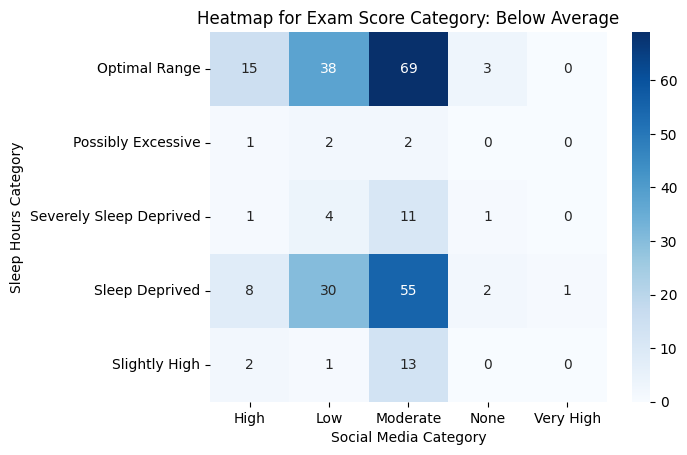

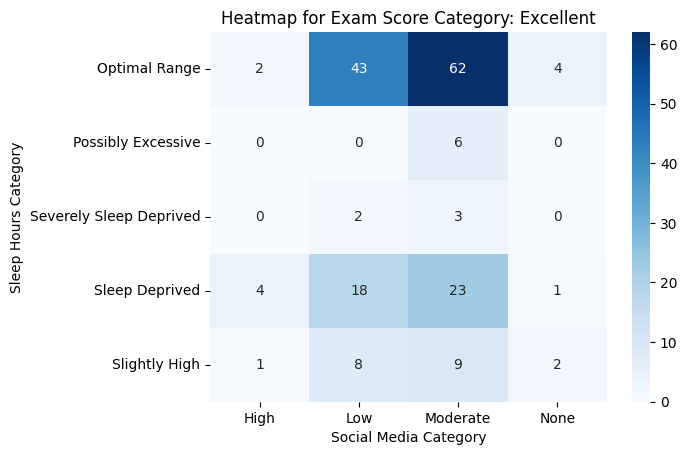

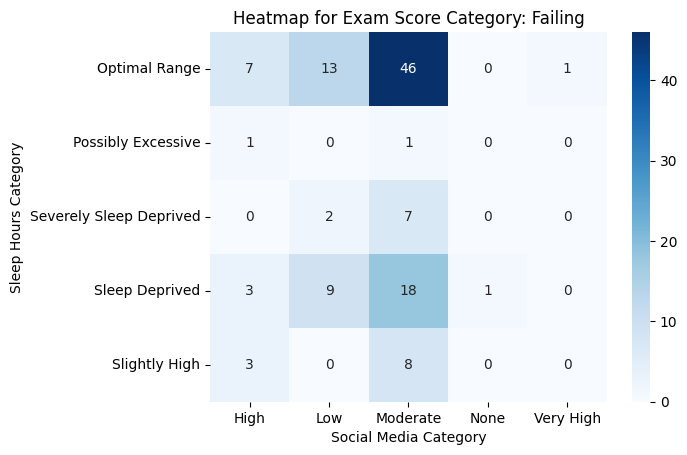

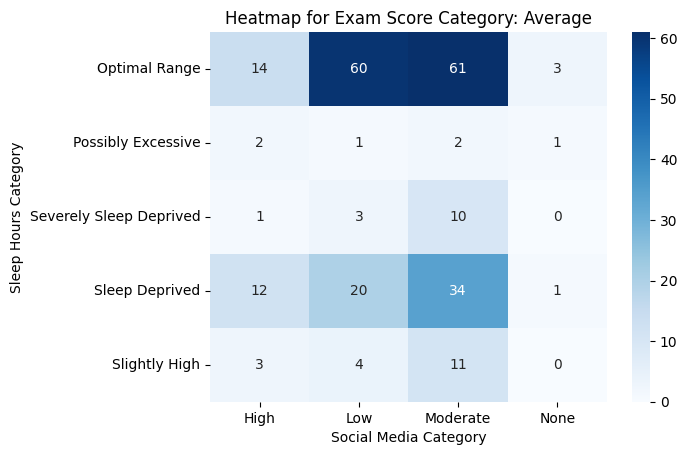

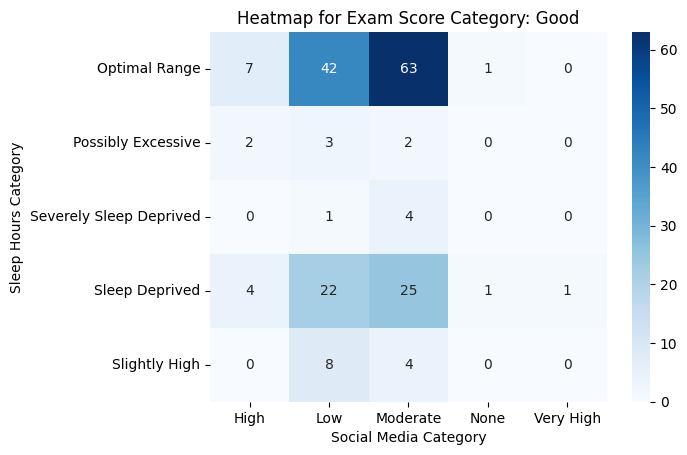

In [94]:
for score_cat in df['exam_score_category'].unique():
    temp = df[df['exam_score_category'] == score_cat]
    heatmap_data = pd.crosstab(temp['sleep_hours_category'], temp['social_media_category'])
    
    sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Heatmap for Exam Score Category: {score_cat}')
    plt.ylabel("Sleep Hours Category")
    plt.xlabel("Social Media Category")
    plt.show()